# Домашнее задание 2

## Задание 1

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm

In [2]:
df = pd.read_excel('hw_2.xlsx')
df

,avgsen,black,born60,durat,hispan,inc86,inc86sq,narr86,nfarr86,nparr86,pcnv,pcnvsq,pt86sq,ptime86,qemp86,tottime
0,0.0,0,1,4.0,0,0.0,0.00,1,0,1,1.0,1.00,0,0,0.0,0.0
1,0.0,0,1,0.0,0,103.7,10753.69,1,1,0,0.5,0.25,0,0,4.0,0.0
2,0.0,0,1,0.0,0,148.2,21963.24,0,0,0,1.0,1.00,0,0,4.0,0.0
3,0.0,0,1,3.0,0,0.0,0.00,0,0,0,1.0,1.00,0,0,0.0,0.0
4,0.0,0,1,0.0,0,183.4,33635.56,0,0,0,0.5,0.25,0,0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0,0,3.0,0,0.0,0.00,1,1,0,0.0,0.00,0,0,0.0,0.0
1496,0.0,0,1,1.0,1,11.5,132.25,0,0,0,0.0,0.00,0,0,3.0,0.0
1497,0.0,0,0,1.0,0,1.9,3.61,0,0,0,0.0,0.00,0,0,1.0,0.0
1498,0.0,1,0,19.0,0,0.0,0.00,1,1,0,0.0,0.00,0,0,0.0,0.0


Создадим столбец 'crime86', который = 1 если есть хотябы один арест за 86 год, и = 0, иначе

In [3]:
df['crime86'] = (df['narr86'] > 0).astype(int)

In [4]:
df

,avgsen,black,born60,durat,hispan,inc86,inc86sq,narr86,nfarr86,nparr86,pcnv,pcnvsq,pt86sq,ptime86,qemp86,tottime,crime86
0,0.0,0,1,4.0,0,0.0,0.00,1,0,1,1.0,1.00,0,0,0.0,0.0,1
1,0.0,0,1,0.0,0,103.7,10753.69,1,1,0,0.5,0.25,0,0,4.0,0.0,1
2,0.0,0,1,0.0,0,148.2,21963.24,0,0,0,1.0,1.00,0,0,4.0,0.0,0
3,0.0,0,1,3.0,0,0.0,0.00,0,0,0,1.0,1.00,0,0,0.0,0.0,0
4,0.0,0,1,0.0,0,183.4,33635.56,0,0,0,0.5,0.25,0,0,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,0,0,3.0,0,0.0,0.00,1,1,0,0.0,0.00,0,0,0.0,0.0,1
1496,0.0,0,1,1.0,1,11.5,132.25,0,0,0,0.0,0.00,0,0,3.0,0.0,0
1497,0.0,0,0,1.0,0,1.9,3.61,0,0,0,0.0,0.00,0,0,1.0,0.0,0
1498,0.0,1,0,19.0,0,0.0,0.00,1,1,0,0.0,0.00,0,0,0.0,0.0,1


### Пункт a

In [8]:
independent_vars = ['pcnv', 'avgsen', 'tottime', 'ptime86', 'qemp86', 'inc86', 'durat', 'black', 'hispan', 'born60']
X = df[independent_vars]
X = sm.add_constant(X)
y = df['crime86']

logit_model = sm.Logit(y, X)
logit_results = logit_model.fit()
print(logit_results.summary())

         Current function value: 0.490542
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                crime86   No. Observations:                 1500
Model:                          Logit   Df Residuals:                     1489
Method:                           MLE   Df Model:                           10
Date:                Mon, 21 Apr 2025   Pseudo R-squ.:                 0.07636
Time:                        17:45:15   Log-Likelihood:                -735.81
converged:                      False   LL-Null:                       -796.64
Covariance Type:            nonrobust   LLR p-value:                 2.330e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8840      0.167     -5.278      0.000      -1.212      -0.556
pcnv          -0.5634      0.171     -3.301      0.001      -0.89

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [52]:
print(f'P(crime86) = Lambda({logit_results.params['const']:0.3f} + {logit_results.params['pcnv']:0.3f} * pcnv + {logit_results.params['avgsen']:0.3f} * avgsen + {logit_results.params['tottime']:0.3f} * tottime + {logit_results.params['ptime86']:0.3f} * ptime86 + {logit_results.params['qemp86']:0.3f} * qemp86 + {logit_results.params['inc86']:0.3f} * inc86 + {logit_results.params['durat']:0.3f} * durat + {logit_results.params['black']:0.3f} * black + {logit_results.params['hispan']:0.3f} * hispan + {logit_results.params['born60']:0.3f} * born60)')

P(crime86) = Lambda(-0.884 + -0.563 * pcnv + 3.872 * avgsen + -3.880 * tottime + -0.079 * ptime86 + 0.065 * qemp86 + -0.011 * inc86 + 0.017 * durat + 0.717 * black + 0.326 * hispan + 0.018 * born60)


### Пункт b

In [13]:
predicted_probs = logit_results.predict(X)
prob_no_arrest = 1 - predicted_probs
prob_no_arrest

0       0.795992
1       0.888311
2       0.946006
3       0.798741
4       0.951825
          ...   
1495    0.696981
1496    0.613223
1497    0.695118
1498    0.461002
1499    0.942243
Length: 1500, dtype: float64

### Пункт c

In [17]:
logit_results.params

const     -0.884002
pcnv      -0.563424
avgsen     3.872228
tottime   -3.880426
ptime86   -0.078793
qemp86     0.064523
inc86     -0.011417
durat      0.017013
black      0.717060
hispan     0.325887
born60     0.017944
dtype: float64

для непрерывных параметров

In [19]:
for coeff in ['pcnv', 'avgsen', 'tottime', 'ptime86', 'inc86', 'durat']:
    print(f'AME для {coeff} = {np.mean(logit_results.params[coeff] * predicted_probs * prob_no_arrest)}')

AME для pcnv = -0.09028044539629097
AME для avgsen = 0.6204681039710447
AME для tottime = -0.6217817805127835
AME для ptime86 = -0.012625500327740463
AME для inc86 = -0.0018293884232154214
AME для durat = 0.002726132256292677


для бинарных расчитаем ручками

In [32]:
marginal_effects_binary = {}
X = df[independent_vars]
X = sm.add_constant(X)
for var in ['black', 'hispan', 'born60']: 
    X_copy_1 = X.copy()
    X_copy_1[var] = 1
    X_copy_0 = X.copy()
    X_copy_0[var] = 0
    predicted_prob_1 = logit_results.predict(X_copy_1)
    predicted_prob_0 = logit_results.predict(X_copy_0)
    marginal_effects_binary[var] = (predicted_prob_1 - predicted_prob_0).mean()
for key, val in marginal_effects_binary.items():
    print(f'AME для {key} = {val}')

AME для black = 0.12901971600378456
AME для hispan = 0.054229989636321474
AME для born60 = 0.0028810686428913175


### Пункт d

In [33]:
odds_ratios = pd.Series(np.exp(logit_results.params), index=X.columns)
odds_ratios

const       0.413126
pcnv        0.569257
avgsen     48.049300
tottime     0.020642
ptime86     0.924231
qemp86      1.066650
inc86       0.988648
durat       1.017159
black       2.048402
hispan      1.385259
born60      1.018106
dtype: float64

Получили вектор вероятностей, теперь посмотрим на значимость с помощью $p-value$

In [35]:
p_values = logit_results.pvalues
significance = p_values <= 0.05

odds_ratio_results = pd.DataFrame({
    'Odds Ratio': odds_ratios,
    'p-value': p_values,
    'Significant': significance
})

print(odds_ratio_results)

         Odds Ratio       p-value  Significant
const      0.413126  1.304238e-07         True
pcnv       0.569257  9.625892e-04         True
avgsen    48.049300  9.999222e-01        False
tottime    0.020642  9.999220e-01        False
ptime86    0.924231  5.478425e-02        False
qemp86     1.066650  3.219467e-01        False
inc86      0.988648  1.315624e-08         True
durat      1.017159  2.877159e-01        False
black      2.048402  3.343243e-05         True
hispan     1.385259  3.836026e-02         True
born60     1.018106  9.042991e-01        False


если коэффициенты значимы, то и отношение шансов значимо, поэтому берем их p-value
![Снимок экрана 2025-04-22 в 19.54.08.png](<attachment:Снимок экрана 2025-04-22 в 19.54.08.png>)
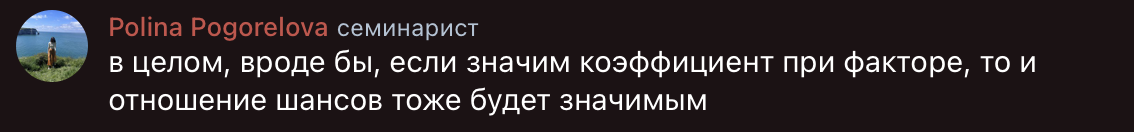

### Пункт e

In [50]:
mean_values = X.mean()
mean_values

african_american = mean_values.copy()
african_american['black'] = 1
african_american['hispan'] = 0
african_american['born60'] = 0

latino_american = mean_values.copy()
latino_american['black'] = 0
latino_american['hispan'] = 1
latino_american['born60'] = 0

prob_african_american = logit_results.predict(african_american)
prob_latino_american = logit_results.predict(latino_american)

prob_difference = prob_african_american - prob_latino_american
prob_difference

None    0.069383
dtype: float64

Проверим значимость с помощью t-statistic, посокольку смотрим на разность вероятностей 

In [53]:
std_errors = logit_results.bse
se_diff = np.sqrt(np.sum(std_errors**2))
t_stat = prob_difference / se_diff
t_stat

None    0.000001
dtype: float64

$p-value = 0.000001 < 0.05$ поэтому значимо

### Пункт f

In [ ]:
from statsmodels.miscmodels.ordinal_model import OrderedModel
independent_vars = ['pcnv', 'avgsen', 'tottime', 'ptime86', 'qemp86', 'inc86', 'durat', 'black', 'hispan', 'born60']

X = df[independent_vars]
y = df['narr86']

model = OrderedModel(y, X, distr='logit')
results = model.fit(method='bfgs', disp=False)
print(results.summary())

                             OrderedModel Results                             
Dep. Variable:                 narr86   Log-Likelihood:                -1034.7
Model:                   OrderedModel   AIC:                             2107.
Method:            Maximum Likelihood   BIC:                             2208.
Date:                Mon, 28 Apr 2025                                         
Time:                        18:54:19                                         
No. Observations:                1500                                         
Df Residuals:                    1481                                         
Df Model:                          10                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pcnv          -0.5151      0.169     -3.056      0.002      -0.845      -0.185
avgsen         1.9877    121.490      0.016      0.9

In [75]:
a = 0
p = model.transform_threshold_params(results.params[10:])
for i in p:
    print(f'C_{a}: {i}')
    a += 1

C_0: -inf
C_1: 0.8310434373017911
C_2: 2.4775260278415483
C_3: 3.359439419155751
C_4: 4.045323573514851
C_5: 4.356521058340284
C_6: 5.21378149816289
C_7: 5.911988643928817
C_8: 6.319137520532035
C_9: 7.014488456265372
C_10: inf


### Пункт g

In [77]:
from scipy.special import expit
expit(p[1] - X @ results.params[:10])

0       0.785714
1       0.893011
2       0.946778
3       0.788071
4       0.953289
          ...   
1495    0.687593
1496    0.626497
1497    0.690715
1498    0.457391
1499    0.945165
Length: 1500, dtype: float64

### Пункт h

In [79]:
from statsmodels.formula.api import logit
from scipy.stats import chi2

models = []
data = df
for i in range(1, 11):
    if i == 8:
        continue
    data[f'y{i}'] = (data['narr86'] > i-1).astype(int)
    
independent_vars = ['const', 'pcnv','avgsen', 'tottime', 'ptime86', 'qemp86', 'inc86', 'durat', 'black','hispan' ,'born60']
data = sm.add_constant(data)
for i in range(1, 11):
    if i == 8:
        continue
    models.append(sm.Logit(data[f'y{i}'], data[independent_vars]).fit(method='bfgs'))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.490621
         Iterations: 35
         Function evaluations: 40
         Gradient evaluations: 40


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.193056
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.098972
         Iterations: 35
         Function evaluations: 44
         Gradient evaluations: 44


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.055762
         Iterations: 35
         Function evaluations: 42
         Gradient evaluations: 42


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.042608
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.017907
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.007548
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.003913
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37
         Current function value: 0.001230
         Iterations: 35
         Function evaluations: 37
         Gradient evaluations: 37


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [82]:
def brant_test(model1, model2):
    delta = model1.params - model2.params
    cov = model1.cov_params() + model2.cov_params()
    wald_stat = delta.T @ np.linalg.inv(cov) @ delta
    p_value = chi2.sf(wald_stat, df=len(delta))
    return wald_stat, p_value

for i in range(1, len(models)):
    wald_stat, p_value = brant_test(models[i-1], models[i])
    print(f"Статистика вальда для модели: {wald_stat:.4f}; p-value: {p_value:.4f}")

Статистика вальда для модели: 147.0472; p-value: 0.0000
Статистика вальда для модели: 19.2998; p-value: 0.0559
Статистика вальда для модели: 10.8477; p-value: 0.4561
Статистика вальда для модели: 3.7560; p-value: 0.9765
Статистика вальда для модели: 5.8898; p-value: 0.8806
Статистика вальда для модели: 2.4857; p-value: 0.9959
Статистика вальда для модели: 1.6267; p-value: 0.9994
Статистика вальда для модели: 0.6533; p-value: 1.0000


### Пункт i

Спасибо Полине за почти готовый код)

In [85]:
import numpy as np
import pandas as pd
from statsmodels.miscmodels.ordinal_model import OrderedModel

category_labels = [0, 1, 2, 3, 4, 5, 6, 7, 9, 10]
def compute_marginal_effects(ordinal_model, fitted_result, epsilon=1e-5):
    num_vars = ordinal_model.exog.shape[1]
    num_categories = len(category_labels)
    margeff_vals = np.zeros((num_vars, num_categories))
    initial_probs = fitted_result.predict()

    for var_idx in range(num_vars):
        X_new = ordinal_model.exog.copy()
        X_new[:, var_idx] += epsilon

        new_probs = fitted_result.model.predict(fitted_result.params, X_new)
        margeff_vals[var_idx] = (new_probs - initial_probs).mean(axis=0) / epsilon
    return margeff_vals

ordered_logit_model = OrderedModel(y, X, distr='logit')
fitted_result = ordered_logit_model.fit(method='bfgs', disp=False)
marginal_effects = compute_marginal_effects(ordered_logit_model, fitted_result)
marginal_effects_df = pd.DataFrame(marginal_effects, columns=[str(label) for label in category_labels])
marginal_effects_df.head()

,0,1,2,3,4,5,6,7,9,10
0,0.082568,-0.055588,-0.014681,-0.005879,-0.001670,-0.002703,-0.001023,-0.000341,-0.000342,-0.000342
1,-0.318655,0.214528,0.056658,0.022688,0.006446,0.010431,0.003949,0.001318,0.001319,0.001319
2,0.320543,-0.215799,-0.056994,-0.022823,-0.006484,-0.010492,-0.003972,-0.001326,-0.001327,-0.001326
3,0.012636,-0.008507,-0.002247,-0.000900,-0.000256,-0.000414,-0.000157,-0.000052,-0.000052,-0.000052
4,-0.005586,0.003761,0.000993,0.000398,0.000113,0.000183,0.000069,0.000023,0.000023,0.000023


In [86]:
# Список для хранения результатов бутстрэпа
bootstrap_marginals = []
num_bootstrap_samples = 50

for _ in range(num_bootstrap_samples):
    bootstrap_indices = np.random.choice(len(X), size=len(X), replace=True)
    X_bootstrap = X.iloc[bootstrap_indices]
    y_bootstrap = y.iloc[bootstrap_indices]
    
    try:
        bootstrap_model = OrderedModel(y_bootstrap, X_bootstrap, distr='logit')
        bootstrap_result = bootstrap_model.fit(method='bfgs', disp=0)
        bootstrap_marginals.append(compute_marginal_effects(bootstrap_model, bootstrap_result))
    except Exception as e:
        continue

bootstrap_marginal_array = np.array(bootstrap_marginals)
ci_lower_bootstrap = np.percentile(bootstrap_marginal_array, 2.5, axis=0)
ci_upper_bootstrap = np.percentile(bootstrap_marginal_array, 97.5, axis=0)
print("95% Доверительные интервалы для бутстрэпированных маржинальных эффектов:")
print("Нижний процентиль:", ci_lower_bootstrap)
print("Верхний процентиль:", ci_upper_bootstrap)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


95% Доверительные интервалы для бутстрэпированных маржинальных эффектов:
Нижний процентиль: [[ 5.41607585e-02 -1.03251216e-01 -2.36093350e-02 -7.76827545e-03
  -4.02746768e-03 -4.24460128e-03 -2.30042843e-03 -1.22477721e-03
  -1.68970563e-03 -1.55979164e-03]
 [-4.17225769e-01  1.47098681e-01  3.61329851e-02  1.28361733e-02
   1.35656969e-03  3.41180180e-03  9.74217634e-04  8.90324576e-04
   8.91736768e-04  9.93034848e-04]
 [ 2.25468784e-01 -2.83865614e-01 -7.73712911e-02 -2.78744595e-02
  -1.08371287e-02 -1.67416716e-02 -8.27712514e-03 -3.62071486e-03
  -3.82510689e-03 -4.02658283e-03]
 [ 6.63079577e-03 -1.56202843e-02 -5.95846367e-03 -2.01188899e-03
  -9.20379843e-04 -7.06533733e-04 -3.01627298e-04 -1.84751809e-04
  -2.40320273e-04 -3.75074874e-04]
 [-2.78622575e-02 -6.41385741e-04 -3.36084246e-04 -1.02787830e-04
  -7.96925204e-05 -9.61427679e-07 -6.87357593e-06 -5.10475776e-06
  -1.35496708e-05 -3.03697402e-05]
 [ 1.36022681e-03 -1.81033782e-03 -5.35857653e-04 -2.02375216e-04
  -7.07

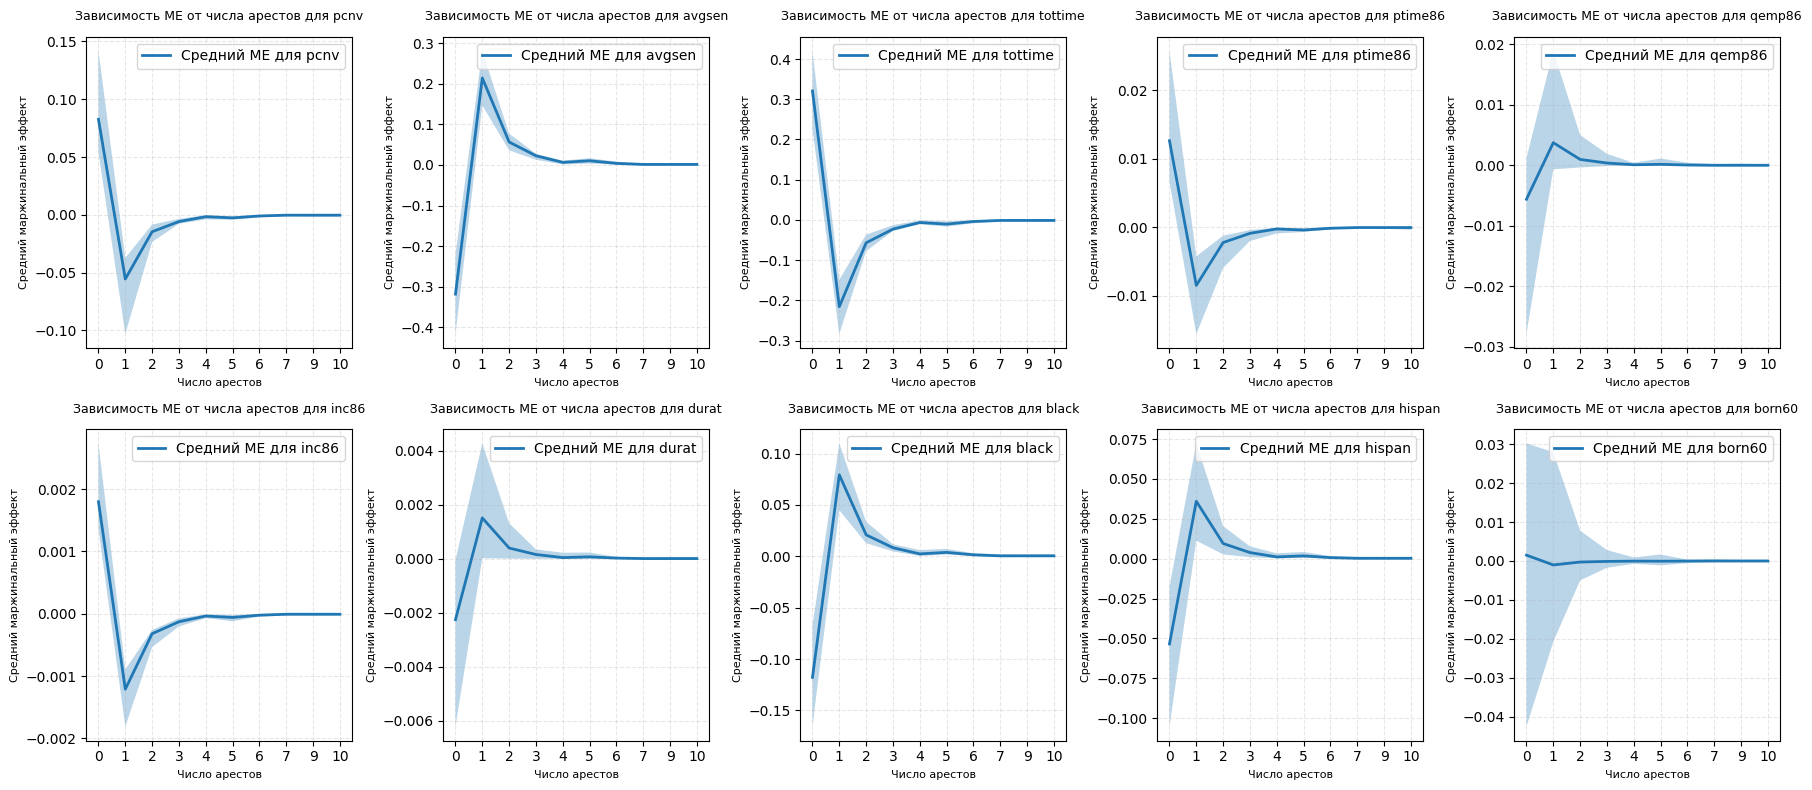

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.5 и 97.5 процентиль для доверительных интервалов
lower_bound_ci = np.percentile(np.array(bootstrap_marginals), 2.5, axis=0)
upper_bound_ci = np.percentile(np.array(bootstrap_marginals), 97.5, axis=0)
feat_names = X.columns.tolist()

fig, subplots = plt.subplots(nrows=2, ncols=5, figsize=(18, 8))
subplots = subplots.flatten()

for idx, feature in enumerate(feat_names[0:]): 
    ax = subplots[idx]
    factor_data = marginal_effects_df.iloc[idx, :]
    sns.lineplot(
        data=factor_data, 
        ax=ax,
        label=f'Средний ME для {feature}', 
        linewidth=2)
    ax.fill_between(
        marginal_effects_df.columns,
        lower_bound_ci[idx, :],
        upper_bound_ci[idx, :],
        alpha=0.3)

    # Настроить заголовок и подписи
    ax.set_title(f'Зависимость ME от числа арестов для {feature}', fontsize=9, pad=12)
    ax.set_xlabel('Число арестов', fontsize=8)
    ax.set_ylabel('Средний маржинальный эффект', fontsize=8)
    ax.grid(True, linestyle='--', alpha=0.3)

# Упорядочиваем расположение графиков
plt.tight_layout()
plt.show()


### Пункт j

In [97]:
from statsmodels.discrete.discrete_model import MNLogit
independent_vars = ['pcnv', 'avgsen', 'tottime', 'ptime86', 'qemp86', 'inc86', 'durat', 'black', 'hispan', 'born60']

X = df[independent_vars]
X = sm.add_constant(X)
y = df['narr86']

mnl_model = MNLogit(y, X)
mnl_results = mnl_model.fit(method='bfgs')
mnl_results.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_optimize.py:1360: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.680987
         Iterations: 35
         Function evaluations: 42
         Gradient evaluations: 42


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                 narr86   No. Observations:                 1500
Model:                        MNLogit   Df Residuals:                     1401
Method:                           MLE   Df Model:                           90
Date:                Wed, 30 Apr 2025   Pseudo R-squ.:                 0.06985
Time:                        19:36:35   Log-Likelihood:                -1021.5
converged:                      False   LL-Null:                       -1098.2
Covariance Type:            nonrobust   LLR p-value:                 3.544e-05
==============================================================================
  narr86=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4013      0.199     -7.059      0.000      -1.790      -1.012
pcnv          -0.7676      0.196     -3.909      0.000      -1.153      -0.383
avgsen         0.3633      0.545      0.666      0.505      -0.705       1.432
tottime       -0.3603      0.543     -0.664      0.507      -1.424       0.704
ptime86       -0.1373      0.063     -2.191      0.028      -0.260      -0.014
qemp86         0.1627      0.073      2.216      0.027       0.019       0.307
inc86         -0.0118      0.002     -5.443      0.000      -0.016      -0.008
durat          0.0179      0.018      0.976      0.329      -0.018       0.054
black          0.7335      0.193      3.803      0.000       0.356       1.112
hispan         0.4127      0.175      2.354      0.019       0.069       0.756
born60         0.2431      0.163      1.494      0.135      -0.076       0.562
------------------------------------------------------------------------------
  narr86=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2530      0.350     -6.432      0.000      -2.940      -1.566
pcnv          -0.9911      0.439     -2.258      0.024      -1.851      -0.131
avgsen         0.2556      0.669      0.382      0.702      -1.056       1.567
tottime       -0.2281      0.665     -0.343      0.732      -1.532       1.076
ptime86       -0.1873      0.170     -1.103      0.270      -0.520       0.146
qemp86         0.0906      0.159      0.570      0.568      -0.221       0.402
inc86         -0.0201      0.007     -2.876      0.004      -0.034      -0.006
durat          0.0486      0.030      1.641      0.101      -0.009       0.107
black          0.0060      0.414      0.015      0.988      -0.805       0.818
hispan        -0.3780      0.430     -0.880      0.379      -1.220       0.464
born60        -0.6735      0.436     -1.546      0.122      -1.527       0.180
------------------------------------------------------------------------------
  narr86=3       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4822      0.548     -2.705      0.007      -2.556      -0.408
pcnv          -0.0218      0.565     -0.039      0.969      -1.129       1.085
avgsen        -0.3782     29.686     -0.013      0.990     -58.563      57.806
tottime       -0.4203     29.420     -0.014      0.989     -58.083      57.242
ptime86       -0.1903      0.115     -1.654      0.098      -0.416       0.035
qemp86        -0.5613      0.273     -2.053      0.040      -1.097      -0.025
inc86         -0.0221      0.013     -1.686      0.092      -0.048       0.004
durat         -0.4803      0.178     -2.700      0.007      -0.829      -0.132
black         -0.2409      0.697     -0.346      0.730      -1.607       1.125
hispan         0.4727      0.501      0.943      0.346      -0.510       1.455
bo

In [96]:
coefficients = mnl_results.params.T
# число арестов, так проще чтобы не ифать 8
arrest_categories = [1, 2, 3, 4, 5, 6, 7, 9, 10]
counter = 0
for _, row in coefficients.iterrows():  
    expression_terms = ["{0:.4f}".format(row["const"])] + \
                       ["{0:.4f}·{1}".format(row[v], v) for v in X.columns[:]]
    logit_expression = " + ".join(expression_terms)
    print(f"P(y={arrest_categories[counter]}) = exp({logit_expression}) / D")
    counter += 1
print("P(y=0) = 1 / D")
print("где  D = 1 + Σ_{j=1}^{K} exp(Xβ_j)")


P(y=1) = exp(-1.4013 + -1.4013·const + -0.7676·pcnv + 0.3633·avgsen + -0.3603·tottime + -0.1373·ptime86 + 0.1627·qemp86 + -0.0118·inc86 + 0.0179·durat + 0.7335·black + 0.4127·hispan + 0.2431·born60) / D
P(y=2) = exp(-2.2530 + -2.2530·const + -0.9911·pcnv + 0.2556·avgsen + -0.2281·tottime + -0.1873·ptime86 + 0.0906·qemp86 + -0.0201·inc86 + 0.0486·durat + 0.0060·black + -0.3780·hispan + -0.6735·born60) / D
P(y=3) = exp(-1.4822 + -1.4822·const + -0.0218·pcnv + -0.3782·avgsen + -0.4203·tottime + -0.1903·ptime86 + -0.5613·qemp86 + -0.0221·inc86 + -0.4803·durat + -0.2409·black + 0.4727·hispan + -0.6856·born60) / D
P(y=4) = exp(-2.9120 + -2.9120·const + -1.1141·pcnv + -0.3340·avgsen + -0.3822·tottime + 0.0192·ptime86 + -1.3129·qemp86 + -0.3950·inc86 + 0.0448·durat + -0.3194·black + -0.5469·hispan + -0.7587·born60) / D
P(y=5) = exp(-1.3883 + -1.3883·const + -0.5014·pcnv + -0.3326·avgsen + -0.3774·tottime + -0.2151·ptime86 + -1.2520·qemp86 + -0.0115·inc86 + -0.6334·durat + 0.0302·black + -0.201

### Пункт k

In [98]:
np.array(mnl_results.predict()[:, 0])

array([0.82087757, 0.88661247, 0.95184274, ..., 0.64553303, 0.48086494,
       0.93911334])

### Пункт l

In [100]:
import warnings
warnings.simplefilter("ignore")

predictors = X.columns.to_list()
all_categories = sorted(y.unique())                
model_equations = [str(cat) for cat in all_categories if cat != all_categories[0]]  

full_params = mnl_results.params.copy()
full_params.columns = model_equations

full_cov = mnl_results.cov_params().copy()  

# Perform restricted models analysis
for current_category in model_equations:
    
    # Create restricted dataset
    restricted_mask = y != int(current_category)
    restricted_model = sm.MNLogit(y[restricted_mask], 
                                X[restricted_mask]).fit(
                                    method="bfgs", 
                                    disp=False
                                )

    restricted_cats = sorted(y[restricted_mask].unique())
    restricted_eqs = [str(c) for c in restricted_cats if c != restricted_cats[0]]

    restricted_params = restricted_model.params.copy()
    restricted_params.columns = restricted_eqs
    restricted_cov = restricted_model.cov_params().copy()
    comparison_eqs = [eq for eq in model_equations if eq != current_category]

    full_vector = full_params[comparison_eqs].values.flatten(order='F')[:, None]
    restricted_vector = restricted_params[comparison_eqs].values.flatten(order='F')[:, None]

    matrix_index = pd.MultiIndex.from_product(
        [comparison_eqs, predictors],
        names=full_cov.index.names
    )

    full_cov_submatrix = full_cov.loc[matrix_index, matrix_index].values
    restricted_cov_submatrix = restricted_cov.loc[matrix_index, matrix_index].values

    param_diff = restricted_vector - full_vector
    cov_diff = restricted_cov_submatrix - full_cov_submatrix         
    test_statistic = abs(float(param_diff.T @ np.linalg.inv(cov_diff) @ param_diff))
    degrees_freedom = param_diff.size
    p_value = 1 - chi2.cdf(test_statistic, degrees_freedom)

    print(f"Категория {current_category}: Т-статистика = {test_statistic:.2f}, "
          f"Хи квадрат = {degrees_freedom}, "
          f"p-value = {p_value:.4f}")

Категория 1: Т-статистика = 4.19, Хи квадрат = 88, p-value = 1.0000
Категория 2: Т-статистика = 28.97, Хи квадрат = 88, p-value = 1.0000
Категория 3: Т-статистика = 31.40, Хи квадрат = 88, p-value = 1.0000
Категория 4: Т-статистика = 17.64, Хи квадрат = 88, p-value = 1.0000
Категория 5: Т-статистика = 19.51, Хи квадрат = 88, p-value = 1.0000
Категория 6: Т-статистика = 18.30, Хи квадрат = 88, p-value = 1.0000
Категория 7: Т-статистика = 20.22, Хи квадрат = 88, p-value = 1.0000
Категория 9: Т-статистика = 29.13, Хи квадрат = 88, p-value = 1.0000
Категория 10: Т-статистика = 23.54, Хи квадрат = 88, p-value = 1.0000


### Пункт m

In [103]:
margeffect = mnl_results.get_margeff(at='overall', method='dydx')
print(margeffect.summary())

       MNLogit Marginal Effects      
Dep. Variable:                 narr86
Method:                          dydx
At:                           overall
  narr86=0      dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pcnv           0.1188      0.027      4.354      0.000       0.065       0.172
avgsen        -0.0406      0.438     -0.093      0.926      -0.900       0.818
tottime        0.0552      0.435      0.127      0.899      -0.797       0.908
ptime86        0.0253      0.011      2.236      0.025       0.003       0.047
qemp86        -0.0017      0.014     -0.117      0.907      -0.030       0.026
inc86          0.0040      0.004      0.974      0.330      -0.004       0.012
durat          0.0097      0.005      2.146      0.032       0.001       0.019
black         -0.0824      0.028     -2.959      0.003      -0.137      -0.028
hispan        -0.0410      0.025     -1.609      0.108    

### Пункт n

In [107]:
odds_ratios = np.exp(mnl_results.params)
print("\nОтношение шансов (odds ratios):")
print(odds_ratios)


Отношение шансов (odds ratios):
                0         1         2         3         4         5         6  \
const    0.246275  0.105086  0.227141  0.054365  0.249491  0.243917  0.228884   
pcnv     0.464119  0.371168  0.978461  0.328215  0.605698  0.615636  0.662754   
avgsen   1.438000  1.291264  0.685092  0.716067  0.717064  0.737990  0.744539   
tottime  0.697450  0.796043  0.656862  0.682371  0.685672  0.705881  0.712354   
ptime86  0.871737  0.829206  0.826713  1.019386  0.806445  0.396972  0.400395   
qemp86   1.176707  1.094864  0.570457  0.269044  0.285933  0.302283  0.296597   
inc86    0.988258  0.980074  0.978094  0.673654  0.988585  0.924753  0.716117   
durat    1.018055  1.049853  0.618579  1.045858  0.530786  0.221749  0.080703   
black    2.082424  1.006068  0.785937  0.726610  1.030629  1.228692  0.710730   
hispan   1.510856  0.685200  1.604240  0.578753  0.817411  0.666476  0.867482   
born60   1.275177  0.509911  0.503765  0.468270  0.900514  0.761501  0.66667

In [109]:
# Проверка значимости: Выводим p-значения
print("p-value:")
print(mnl_results.pvalues)

p-value:
                    0             1         2         3         4         5  \
const    1.680964e-12  1.261728e-10  0.006838  0.000013  0.068437  0.363094   
pcnv     9.286943e-05  2.395030e-02  0.969242  0.307403  0.560845  0.752135   
avgsen   5.052058e-01  7.024975e-01  0.989835  0.989199  0.989885  0.996644   
tottime  5.068793e-01  7.317483e-01  0.988602  0.987281  0.988244  0.996131   
ptime86  2.845749e-02  2.701440e-01  0.098172  0.864638  0.171155  0.830282   
qemp86   2.670307e-02  5.684517e-01  0.040071  0.595087  0.018223  0.305792   
inc86    5.240525e-08  4.032039e-03  0.091740  0.718275  0.627674  0.520845   
durat    3.289778e-01  1.007239e-01  0.006933  0.468443  0.028646  0.142207   
black    1.428554e-04  9.883432e-01  0.729683  0.739252  0.970962  0.876978   
hispan   1.858362e-02  3.788503e-01  0.345643  0.597663  0.818344  0.814043   
born60   1.350737e-01  1.221214e-01  0.261471  0.434865  0.885318  0.845644   

                6         7         8  
co

### Пункт o

In [110]:
X = data[['pcnv', 'avgsen', 'tottime', 'ptime86', 'qemp86', 'inc86', 'durat', 'black', 'hispan', 'born60']]
y = data['crime86']
X = sm.add_constant(X)

model1 = sm.Logit(y, X).fit()
y = data['narr86']
X = X.drop(['const'], axis=1)
model2 = OrderedModel(y, X, distr='logit').fit(method='bfgs', disp=False)
model3 = mnl_results

predictions_1 = 1 - model1.predict()
predictions_2 = model2.predict()[:, 0]
predictions_3 = model3.predict()[:, 0]


         Current function value: 0.490542
         Iterations: 35


In [111]:
from sklearn.metrics import accuracy_score
print('accuracies\n')
print(f'logit: {accuracy_score(data['crime86'], 1 - (predictions_1 > 0.5).astype(int))}')
print(f'ordered: {accuracy_score(data['crime86'], 1 - (predictions_2 > 0.5).astype(int))}')
print(f'multinomial: {accuracy_score(data['crime86'], 1 - (predictions_3 > 0.5).astype(int))}\n')

print('AIC\n')
print(f'logit: {model1.aic}')
print(f'ordered: {model2.aic}')
print(f'multinomial: {model3.aic}\n')

print('Pseudo R2\n')
print(f'logit: {model1.prsquared}')
print(f'ordered: {model2.prsquared}')
print(f'multinomial: {model3.prsquared}')

accuracies

logit: 0.7773333333333333
ordered: 0.778
multinomial: 0.7786666666666666

AIC

logit: 1493.6249874345356
ordered: 2107.3801047737284
multinomial: 2240.9623988174753

Pseudo R2

logit: 0.0763572610627139
ordered: 0.05782021219867184
multinomial: 0.06984810113092232


## Задание 2

### Пункт a

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Задание размера выборки n
n = 500 

# Задание средней и ковариационной матрицы
mu = [0, 0]  # Средние значения для x2 и x3
cov_matrix = [[1, 0.7], [0.7, 1]]  # Ковариационная матрица с корреляцией 0.7 между x2 и x3

# Генерация коррелированных данных для x2 и x3
np.random.seed(42)
X = np.random.multivariate_normal(mu, cov_matrix, size=n)
X = sm.add_constant(X)

beta_1 = 0.5   # Коэффициент для свободного члена
beta_2 = 1.0   # Коэффициент для x2
beta_3 = -0.5  # Коэффициент для x3
betas = np.array([beta_1, beta_2, beta_3])

# Ошибки 
eps = np.random.logistic(size=n)

# Генерация латентной переменной y*
y_star = X @ betas.T + eps

# Генерация зависимой бинарной переменной y
y = (y_star > 0).astype(int)


### Пункт b

In [138]:
from scipy.optimize import minimize
def func(beta):
    '''Логарифм правдоподобия''' 
    return -sum((y * np.log(expit(X @ beta)) + (1 - y) * np.log(1-expit(X @ beta)))) 

def CalulateML(X, y) -> np.array: #возвращаем оптимальные беты
    beta0 = np.zeros(X.shape[1]) 
    opt = minimize(func, beta0, method="BFGS") #оптимизируем 
    return opt.x 
betas = CalulateML(X, y)
betas

array([ 0.57784012,  1.08547572, -0.46740988])

Функция правдоподобия для логит модели:

$$L(\beta) = \Pi_{i=1}^{n}\Lambda(x_i'\beta)^{y_i}(1 - \Lambda(x_i'\beta))^{1-y_i}$$

$$\log(L) = \sum_{i=1}^{n}(y_i \log(\Lambda(x_i'\beta)) + (1 - y_i)\log(1 - \Lambda(x_i'\beta)) \rightarrow \max_{\beta}$$

In [137]:

python_model = sm.Logit(y, X)
python_results = python_model.fit()
python_results.params

Optimization terminated successfully.
         Current function value: 0.601158
         Iterations 5


array([ 0.57784019,  1.08547573, -0.46740974])

Результаты работы нашей функции и функции питона почти идентичны и очень близки к истинным значениям

### Пункт с

В рамках логистической регрессии, предельные эффекты можно выразить через производные вероятности $ P(y_i = 1 | x) $ и $ P(y_i = 0 | x) $ по соответствующим переменным $ x_{ij} $. Рассмотрим первую производную для вероятности \( y_i = 1 \):

$$
\frac{\partial}{\partial x_{ij}} P(y_i = 1 | x_{i2}, x_{i3}) = \beta_j \cdot \lambda(x_i \beta) \cdot \left( 1 - \lambda(x_i \beta) \right)
$$

где $ \lambda(x_i \beta) = \frac{1}{1 + e^{-x_i \beta}} $ — это функция логистической сигмоиды.

Средний предельный эффект для вероятности $ P(y_i = 1 | x) $ может быть записан как:

$$
AME_i \left( P(y_i = 1 | x) \right) = \frac{1}{n} \sum_{i=1}^{n} \beta_j \cdot \lambda(x_i \beta) \cdot \left( 1 - \lambda(x_i \beta) \right)
$$

Для вероятности $ y_i = 0 $, аналогично вычисляется предельный эффект:

$$
AME_i \left( P(y_i = 0 | x) \right) = -\frac{1}{n} \sum_{i=1}^{n} \beta_j \cdot \lambda(x_i \beta) \cdot \left( 1 - \lambda(x_i \beta) \right)
$$

Теперь для вычисления стандартных ошибок предельных эффектов применяется метод делты, который использует ковариационную матрицу оценок коэффициентов модели. Стандартные ошибки можно выразить следующим образом:

$$
SE_{ME} = \sqrt{ \hat{\Sigma} }
$$

где $ \hat{\Sigma} $ — оценка ковариационной матрицы для коэффициентов.

Для нахождения градиента функции среднего предельного эффекта, используем производную:

$$
\frac{dAME_1}{d\beta_k} = \frac{1}{n} \sum_{i=1}^{n} \left( d \beta_k \right) \cdot w_i
$$

где $ w_i $ — это веса, которые зависят от производных логистической функции.

Затем для каждого наблюдения можно вычислить производные:

$$
\frac{du_i}{d\beta_k} = \left( 1 - 2p_i \right) \cdot w_i \cdot X_{ik}
$$

где $ p_i $ — это вероятность для наблюдения $ i $, а $ X_{ik} $ — соответствующий элемент признаков.

Для упрощения расчетов и представления всех коэффициентов в матричной форме, используем:

$$
J = w^T \cdot \beta \cdot G^T
$$

где $ G $ — это вектор коэффициентов модели, который объединяет все параметры.

In [141]:
from scipy.stats import norm

def marginal_effects(x, b, var_b, y=1):
    mes = ((-1)**(y + 1) * np.full(shape=(len(b), x.shape[0]), fill_value=np.exp(x @ b) / (1 + np.exp(x @ b))**2) * b[:, np.newaxis])
    ame = np.mean(mes, axis=1)

    p = np.exp(x @ b) / (1 + np.exp(x @ b))
    g = np.diag(np.full(shape=len(b), fill_value=np.mean(p * (1 - p))))
    g += np.full(shape=(len(b), len(b)), fill_value=b[:, np.newaxis] * np.mean(((1 - 2 * p) * p * (1 - p))[:, np.newaxis] * x, axis=0))
    std = np.sqrt(np.diag((g @ var_b) @ g.T)) 

    zs = ame / std 
    pv = 2 * (1 - norm.cdf(np.abs(zs)))

    df = pd.DataFrame()
    df['avg ME'] = ame 
    df['std'] = std 
    df['z-stat'] = zs 
    df['p-value'] = pv

    return df

In [143]:
marginal_effects(X, betas, python_results.cov_params())

,avg ME,std,z-stat,p-value
0,0.119684,0.018055,6.628782,3.384693e-11
1,0.224828,0.026118,8.608239,0.000000e+00
2,-0.096812,0.027860,-3.474943,5.109616e-04


### Пункт d

In [144]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import chi2

def log_likelihood(beta, X, y):
    eta = X @ beta
    log_likelihood_value = -np.sum(y * eta - np.log(1 + np.exp(eta)))
    return log_likelihood_value

def likelihood_ratio_test(X, beta, y, constraints):
    # Логарифм функции правдоподобия для неограниченной модели
    ll_unrestricted = -log_likelihood(beta, X, y)

    # Оценка коэффициентов для ограниченной модели
    restricted_beta = minimize(log_likelihood, x0=np.zeros(len(beta)), args=(X, y), constraints=constraints).x
    ll_restricted = -log_likelihood(restricted_beta, X, y)

    # Вычисление статистики LR
    lr_statistic = -2 * (ll_restricted - ll_unrestricted)

    # Вычисление p-value
    p_value = 1 - chi2.cdf(lr_statistic, df=len(constraints))

    return lr_statistic, p_value


In [145]:
_ = [{
    'type': 'eq',
    'fun': lambda x : x[2] - 3
}]

print('H0: beta_2 = 3 \nH1: beta_2 != 3')

stat, pv = likelihood_ratio_test(X, betas, y, _)
print(f'LM-statistic = {stat}, p-value = {pv}')

H0: beta_2 = 3 
H1: beta_2 != 3
LM-statistic = 524.8509660562374, p-value = 0.0


In [148]:
from scipy.stats import chi2
from jax import grad


def wald_test(X, beta, constraints):
    # Вычисление градиента и значений ограничений
    gradients = np.array([grad(c['fun'])(beta) for c in constraints])
    values = np.array([c['fun'](beta) for c in constraints])

    # Вычисление матрицы весов
    predicted_probs = 1 / (1 + np.exp(-X @ beta))
    W = np.diag(predicted_probs * (1 - predicted_probs))

    # Матричные вычисления для статистики Вальда
    fi = X.T @ W @ X
    wald_statistic = values.T @ np.linalg.inv(gradients @ np.linalg.inv(fi) @ gradients.T) @ values

    # Вычисление p-value
    p_value = 1 - chi2.cdf(wald_statistic, df=len(constraints))

    return wald_statistic, p_value


In [149]:
_ = [{
    'type': 'eq',
    'fun': lambda x : x[2] - 3
}]

print('H0: beta_2 = 3 \nH1: beta_2 != 3')

stat, pv = wald_test(X, betas, _)
print(f'LM-statistic = {stat}, p-value = {pv}')

H0: beta_2 = 3 
H1: beta_2 != 3
LM-statistic = 611.7962478050146, p-value = 0.0


In [152]:
from scipy.optimize import minimize
from scipy.stats import chi2

def lm_test(X, beta, y, constraints):
    # Оценка коэффициентов для ограниченной модели
    restricted_beta = minimize(log_likelihood, x0=np.zeros(len(beta)), args=(X, y), constraints=constraints).x
    predicted_probs = 1 / (1 + np.exp(-X @ restricted_beta))
    
    # Градиент функции для множителей Лагранжа
    grad_lag = X.T @ (predicted_probs - y)
    
    # Матричные вычисления для статистики LM
    W = np.diag(predicted_probs * (1 - predicted_probs))
    fi = X.T @ W @ X
    lm_statistic = grad_lag.T @ np.linalg.inv(fi) @ grad_lag
    
    # Вычисление p-value
    p_value = 1 - chi2.cdf(lm_statistic, df=len(constraints))

    return lm_statistic, p_value


In [153]:
_ = [{
    'type': 'eq',
    'fun': lambda x : x[2] - 3
}]

print('H0: beta_2 = 3 \nH1: beta_2 != 3')

stat, pv = lm_test(X, betas, y, _)
print(f'LM-statistic = {stat}, p-value = {pv}')

H0: beta_2 = 3 
H1: beta_2 != 3
LM-statistic = 1209.8908899445396, p-value = 0.0


### Подробное описание функций

В этом разделе мы подробно рассмотрим три функции для тестирования гипотезы о параметрах логистической регрессии с использованием различных методов: теста отношения правдоподобия (LR), теста Вальда (Wald), и теста множителей Лагранжа (LM). Также приведем необходимые математические формулы для каждого из этих тестов.

---

### 1. Функция `likelihood_ratio_test`

Функция `likelihood_ratio_test` проводит тест отношения правдоподобия (LR) для оценки значимости ограничений на параметры модели логистической регрессии. Этот тест используется для сравнения двух моделей — ограниченной (с наложением ограничений на параметры) и неограниченной (где параметры могут принимать любые значения).

#### Аргументы функции:

- `X` — матрица объясняющих переменных (размерность $n \times k$, где $n$ — количество наблюдений, а $k$ — количество признаков).
- `beta` — вектор коэффициентов модели для неограниченной модели (размерность $k \times 1$).
- `y` — вектор целевых переменных (0 или 1), размерность $n \times 1$.
- `constraints` — список ограничений для модели. Эти ограничения задают значения для некоторых коэффициентов (например, $\beta_1 = 0$).

#### Описание выполнения:

1. **Неограниченная модель**:
   Рассчитывается логарифм функции правдоподобия для неограниченной модели (с параметрами $\beta$):

   $$
   \text{LL}_{\text{unrestricted}} = - \sum_{i=1}^{n} \left( y_i \cdot \eta_i - \log(1 + e^{\eta_i}) \right)
   $$

   где $\eta_i = X_i \beta$ — линейная комбинация объясняющих переменных для $i$-го наблюдения.

2. **Ограниченная модель**:
   Рассчитывается логарифм функции правдоподобия для ограниченной модели, где параметры $\beta$ подчиняются заданным ограничениям. Для этого оптимизируется функция правдоподобия с учетом этих ограничений.

3. **Статистика теста LR**:
   Статистика теста LR вычисляется как:

   $$
   \text{LR} = -2 \left( \text{LL}_{\text{restricted}} - \text{LL}_{\text{unrestricted}} \right)
   $$

4. **P-value**:
   P-value вычисляется на основе статистики LR с использованием распределения хи-квадрат с количеством степеней свободы, равным числу ограничений:

   $$
   p\text{-value} = 1 - \chi^2_{\text{cdf}}(\text{LR}, df)
   $$

   где $df$ — это количество ограничений в модели.

#### Возвращаемые значения:
- `lr_statistic` — значение статистики теста LR.
- `p_value` — p-value для теста LR.

---

### 2. Функция `wald_test`

Функция `wald_test` реализует тест Вальда, который используется для проверки значимости ограничений на параметры модели. Тест Вальда вычисляет статистику, основанную на оценках коэффициентов и их ковариационной матрице, чтобы проверить, насколько далеки коэффициенты от значений, предложенных гипотезой.

#### Аргументы функции:

- `X` — матрица объясняющих переменных (размерность $n \times k$).
- `beta` — вектор коэффициентов модели (размерность $k \times 1$).
- `constraints` — список ограничений для коэффициентов модели.

#### Описание выполнения:

1. **Градиенты и значения ограничений**:
   Для каждого из ограничений вычисляется градиент функции (производная) и сам расчет ограничений:

   $$
   g = c(\beta)
   $$

   где $c(\beta)$ — функция ограничений на параметры модели, а $g$ — это вектор значений этих ограничений.

2. **Весовая матрица**:
   Для предсказанных вероятностей вычисляется диагональная матрица весов $W$:

   $$
   W = \text{diag}(p_i(1 - p_i))
   $$

   где $p_i = \frac{1}{1 + e^{-X_i \beta}}$ — предсказанная вероятность для $i$-го наблюдения.

3. **Матричные вычисления для статистики Вальда**:
   Статистика Вальда вычисляется с использованием градиентов и весовой матрицы:

   $$
   W = g^T \cdot \left( \frac{1}{\nabla^T \cdot F^{-1} \cdot \nabla} \right) \cdot g
   $$

   где $\nabla$ — это градиенты, а $F^{-1}$ — обратная матрица информации о модели.

4. **P-value**:
   P-value вычисляется на основе статистики Вальда с использованием распределения хи-квадрат:

   $$
   p\text{-value} = 1 - \chi^2_{\text{cdf}}(W, df)
   $$

   где $df$ — это количество ограничений в модели.

#### Возвращаемые значения:
- `wald_statistic` — значение статистики теста Вальда.
- `p_value` — p-value для теста Вальда.

---

### 3. Функция `lm_test`

Функция `lm_test` реализует тест множителей Лагранжа (LM), который также используется для проверки значимости ограничений на параметры модели. Этот тест проверяет, насколько ограничения на коэффициенты противоречат данным, используя информацию о градиентах и ковариационной матрице.

#### Аргументы функции:

- `X` — матрица объясняющих переменных (размерность $n \times k$).
- `beta` — вектор коэффициентов модели (размерность $k \times 1$).
- `y` — вектор целевых переменных (0 или 1), размерность $n \times 1$.
- `constraints` — список ограничений для коэффициентов модели.

#### Описание выполнения:

1. **Оценка коэффициентов для ограниченной модели**:
   Оптимизируется функция правдоподобия с учетом ограничений, что позволяет найти значения коэффициентов для ограниченной модели.

2. **Предсказанные вероятности и градиент**:
   Вычисляются предсказанные вероятности $p$, затем вычисляется градиент логарифма функции правдоподобия для ограниченной модели:

   $$
   \text{grad\_l} = X^T \cdot (p - y)
   $$

3. **Матричные вычисления для статистики LM**:
   Статистика LM вычисляется с использованием градиента и ковариационной матрицы предсказанных вероятностей:

   $$
   \text{LM} = \text{grad\_l}^T \cdot \left( X^T W X \right)^{-1} \cdot \text{grad\_l}
   $$

   где $W$ — это диагональная матрица с предсказанными вероятностями $p_i(1 - p_i)$.

4. **P-value**:
   P-value для статистики LM вычисляется с использованием распределения хи-квадрат:

   $$
   p\text{-value} = 1 - \chi^2_{\text{cdf}}(\text{LM}, df)
   $$

   где $df$ — это количество ограничений.

#### Возвращаемые значения:
- `lm_statistic` — значение статистики теста LM.
- `p_value` — p-value для теста LM.

---

### Заключение

- **LR тест** — это тест для сравнения двух моделей (ограниченной и неограниченной), основанный на логарифмах функции правдоподобия.
- **Wald тест** — используется для проверки значимости ограничений, вычисляя статистику на основе оценки параметров и их ковариационной матрицы.
- **LM тест** — проверяет, насколько ограничения противоречат данным, используя информацию о градиентах и ковариационной матрице.

Все три теста используют методы, основанные на распределении хи-квадрат для оценки значимости ограничений на параметры модели логистической регрессии.


### Пункт e

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(fit_intercept=True)
log_reg.fit(X, y)

# Ограничение для теста (проверяем, что beta_1 = -3)
constraints = [{'type': 'eq', 'fun': lambda b: b[1] + 3}]  # Проверяем, что beta_1 = -3

# Выполнение тестов
lr_stat, lr_pval = likelihood_ratio_test(X, betas, y, constraints)
wald_stat, wald_pval = wald_test(X, betas, constraints)
lm_stat, lm_pval = lm_test(X, betas, y, constraints)

# Вывод результатов
print(f"LR Test: Statistic = {lr_stat}, p-value = {lr_pval}")
print(f"Wald Test: Statistic = {wald_stat}, p-value = {wald_pval}")
print(f"LM Test: Statistic = {lm_stat}, p-value = {lm_pval}")

LR Test: Statistic = 766.6858033472713, p-value = 0.0
Wald Test: Statistic = 687.811415625283, p-value = 0.0
LM Test: Statistic = 1872.7783514442424, p-value = 0.0


In [156]:
critical_value = chi2.ppf(0.95, df=1)  # Критическое значение для 5% уровня значимости
print(f"Critical Value (5% significance): {critical_value}")


Critical Value (5% significance): 3.841458820694124
